In [72]:
import matplotlib.pyplot as plt
import pandas as pd

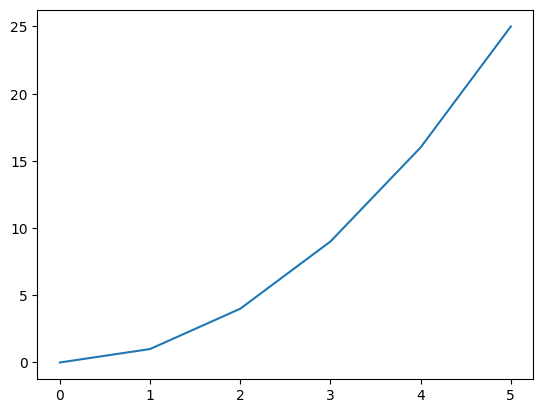

In [ ]:
plt.plot([0, 1, 4, 9, 16, 25])

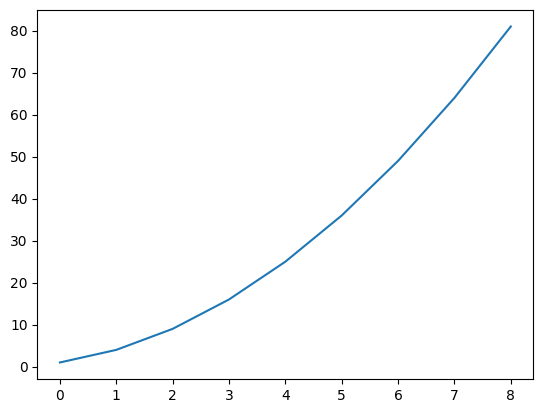

In [13]:
# With a list we plot as follows
# y = list(map(lambda x: x**2, range(1, 10)))
y = [x**2 for x in range(1, 10)]
plt.plot(y)

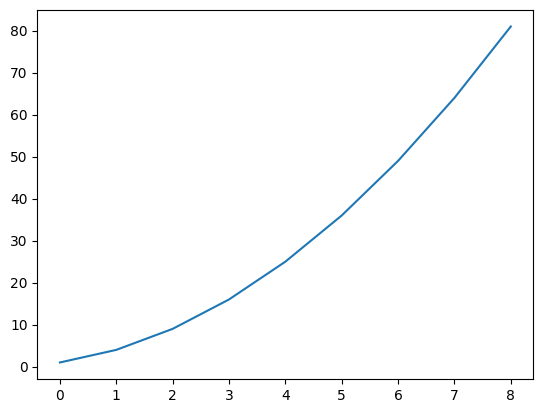

In [14]:
# Now as a pandas Series
plt.plot(pd.Series(y))

In [12]:
list(map(lambda x: x**2, range(1, 10))) 



[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [16]:
data = [x * 10 for x in range(10)]
data

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [18]:
labels = [f'{x}!' for x in range(10)]
labels

['0!', '1!', '2!', '3!', '4!', '5!', '6!', '7!', '8!', '9!']

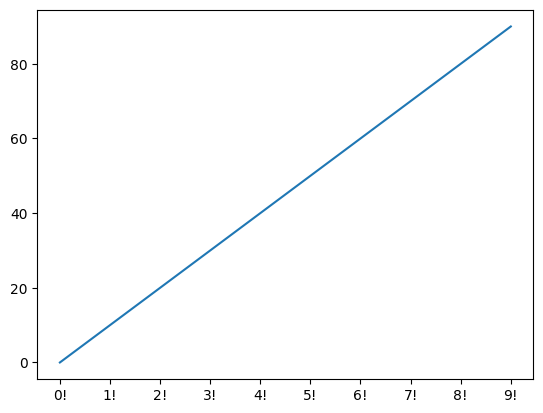

In [21]:
plt.plot(labels, data);

In [22]:
# Create a dataframe where our 1st column is the data and the second columns is the same divided by two
df = pd.DataFrame(data, labels).assign(series2 = lambda x: x[0] /2)
df.head()

,0,series2
0!,0,0.0
1!,10,5.0
2!,20,10.0
3!,30,15.0
4!,40,20.0


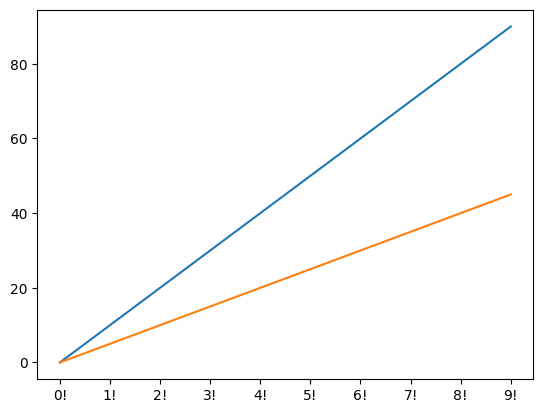

In [23]:
plt.plot(df)

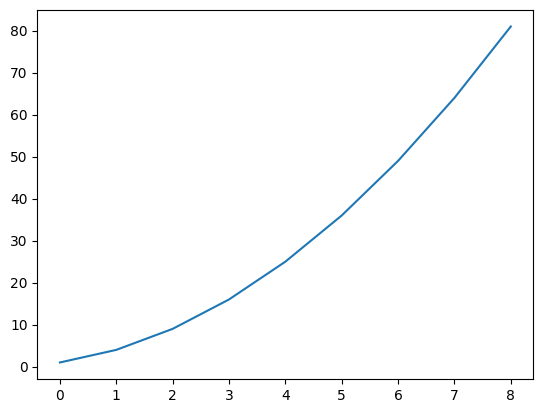

In [25]:
# Using object oriented programming as plotting
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(y);

Text(0.5, 1.0, 'Title')

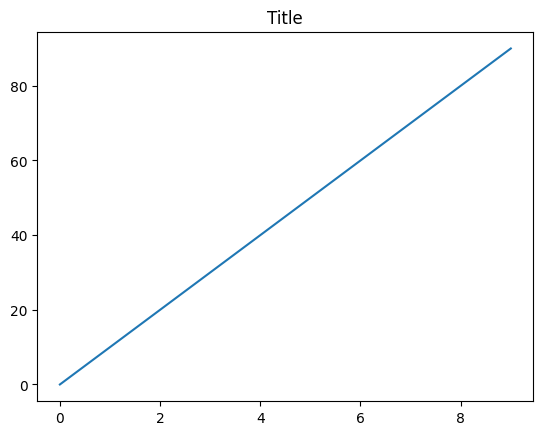

In [27]:
plt.plot(data)
plt.title("Title")

Text(0.5, 0.98, 'Overall Title')

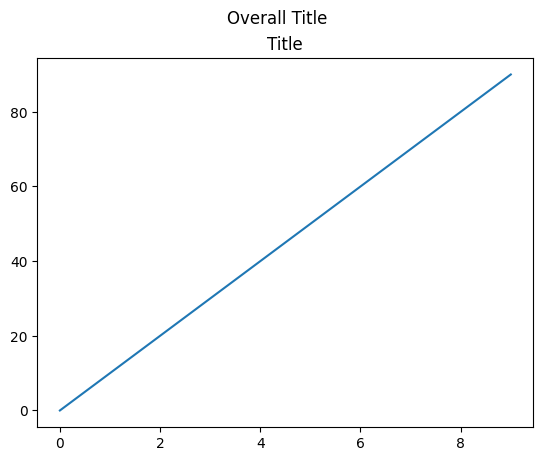

In [32]:
# Using OO approach
fig, ax = plt.subplots()

ax.plot(data)
ax.set_title("Title")
fig.suptitle("Overall Title")

In [ ]:
# Plotting dataframes
housing = pd.read_csv("../Data/housing_data.csv")
housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,NaN,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325.0,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577.0,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22.0,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12.0,54.0,55.0,151.2,158062.5,38.300000


### Creating a chart from scratch

In [ ]:
# set_title() and set_label() let you add chart titles and axis labels
housing['region_name'].value_counts()

region_name
Sussex County, VA           278
Union County, TN            278
Radford, VA                 278
Minnehaha County, SD        278
Perry County, MO            278
                           ... 
Dunklin County, MO           11
Clark County, MO              6
Oglala Lakota County, SD      5
Pemiscot County, MO           4
Lake County, TN               2
Name: count, Length: 2399, dtype: int64

In [39]:
# Data Prep
housing_raw = pd.read_csv("../Data/housing_data.csv", parse_dates=["period_begin", "period_end"])

ca_housing = (
    housing_raw
    .loc[housing_raw["region_name"].str.contains("CA")]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .query("region_name in ['San Francisco', 'Los Angeles', 'San Diego']")
)

ca_housing_markets = (
    ca_housing
    .set_index("period_begin")
    .loc[:, ["region_name", "median_active_list_price"]]
    .sort_index()
    .pivot_table(
        index="period_begin",
        columns="region_name",
        values="median_active_list_price"
    )
   .resample("QE")
   .mean()
)

In [63]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
889,Los Angeles,2018-08-20,2018-11-11,16015.0,20026.0,21675.0,51.9,694662.5,16.528985
3773,Los Angeles,2017-12-25,2018-03-18,13596.0,13817.0,15251.0,51.3,664516.6,13.834214
5859,Los Angeles,2019-01-21,2019-04-14,13372.0,18580.0,20097.0,58.2,697324.3,18.764906
6000,San Francisco,2020-12-21,2021-03-14,1382.0,1131.0,1287.0,52.7,1279000.0,11.604949
6477,San Francisco,2020-06-15,2020-09-06,1251.0,1596.0,1748.0,35.4,1396083.3,17.027700


In [65]:
prices = ca_housing.groupby("region_name").agg({'total_homes_sold':'sum'}).sort_values("total_homes_sold")
prices

,total_homes_sold
region_name,
San Francisco,371776.0
San Diego,2373289.0
Los Angeles,4622703.0


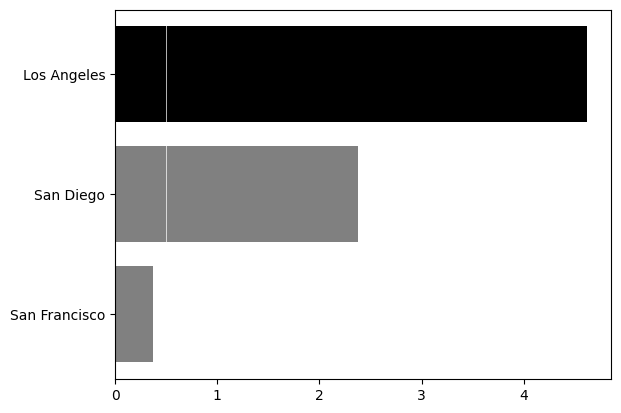

In [69]:
fig, ax = plt.subplots()

ax.barh(prices.index, prices["total_homes_sold"]/1e6,
        color = ["Grey", "Grey", "Black"]);
ax.axvline(x = 0.5, color = "white", linewidth = 0.5)

In [54]:
housing_raw.columns

Index(['region_name', 'period_begin', 'period_end', 'total_homes_sold',
       'inventory', 'active_listings', 'age_of_inventory',
       'median_active_list_price', 'months_of_supply'],
      dtype='object')

In [95]:
ca_or = housing_raw.loc[housing_raw["region_name"].str[-2:].isin(["CA", "OR", "WA"])]

ca_or.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107.0,1729.0,2206.0,27.5,445540.9,5.235794
19,"Garfield County, WA",2019-06-17,2019-09-08,7.0,9.0,10.0,52.7,152666.6,9.333333
26,"Gilliam County, OR",2018-06-18,2018-09-09,3.0,9.0,9.0,95.6,143037.5,9.000000
99,"Klickitat County, WA",2017-04-17,2017-07-09,48.0,53.0,58.0,87.2,326237.5,16.193434
124,"Jefferson County, WA",2017-02-06,2017-04-30,138.0,177.0,190.0,127.8,404637.5,22.486617


In [96]:
ca_or_tmp = ca_or.assign(
    price_range = pd.cut(
        ca_or.loc[:, "median_active_list_price"], 
        [0, 400000, 600000, 2000000],
        labels = ["0-400k", "400k-600k", "600k+"]),
    state = ca_or["region_name"].str[-2:]
    )


In [97]:
ca_or_tmp.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_range,state
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107.0,1729.0,2206.0,27.5,445540.9,5.235794,400k-600k,CA
19,"Garfield County, WA",2019-06-17,2019-09-08,7.0,9.0,10.0,52.7,152666.6,9.333333,0-400k,WA
26,"Gilliam County, OR",2018-06-18,2018-09-09,3.0,9.0,9.0,95.6,143037.5,9.000000,0-400k,OR
99,"Klickitat County, WA",2017-04-17,2017-07-09,48.0,53.0,58.0,87.2,326237.5,16.193434,0-400k,WA
124,"Jefferson County, WA",2017-02-06,2017-04-30,138.0,177.0,190.0,127.8,404637.5,22.486617,400k-600k,WA


<Axes: xlabel='price_range', ylabel='inventory'>

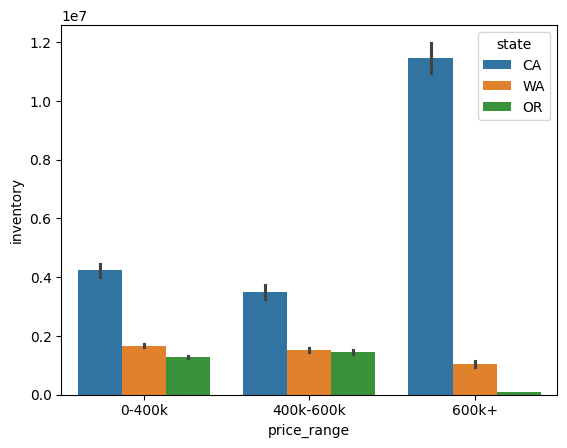

In [100]:
# USe seaborn to create an offset bar
import seaborn as sns

sns.barplot(
    x = "price_range",
    y = "inventory", 
    hue = "state", 
    estimator = sum,
    data = ca_or_tmp
)


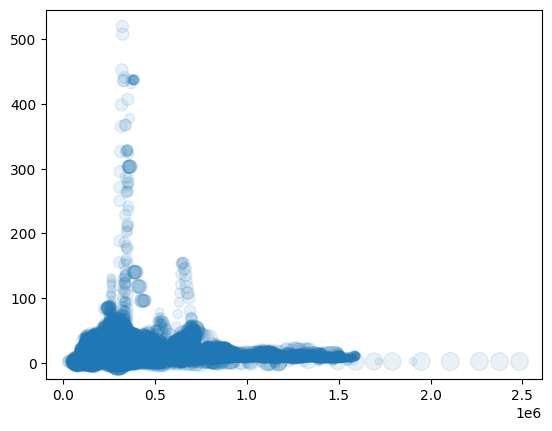

In [118]:
fig, ax = plt.subplots()

ax.scatter( ca_or_tmp["median_active_list_price"], ca_or_tmp["months_of_supply"], s = ca_or_tmp["age_of_inventory"], alpha = 0.1);

#?ax.scatter # To get to the function documentation

(array([8.1740e+03, 1.9403e+04, 4.9870e+03, 1.5290e+03, 8.3500e+02,
        5.1800e+02, 3.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+01]),
 array([  29841.6,  292174. ,  554506.4,  816838.8, 1079171.2, 1341503.6,
        1603836. , 1866168.4, 2128500.8, 2390833.2, 2653165.6]),
 <BarContainer object of 10 artists>)

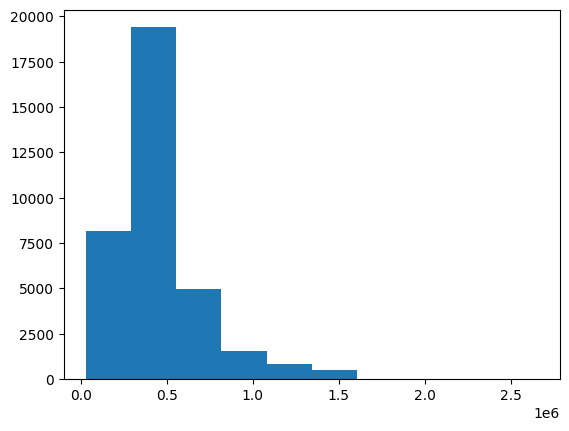

In [121]:
fig, ax = plt.subplots()

ax.hist(ca_or_tmp["median_active_list_price"])

In [124]:
diamonds = pd.read_csv("../Data/Diamonds Prices2022.csv").drop(["Unnamed: 0"], axis = 1)

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0.5, 1.0, 'Histogram of carats using density and 20 bins')

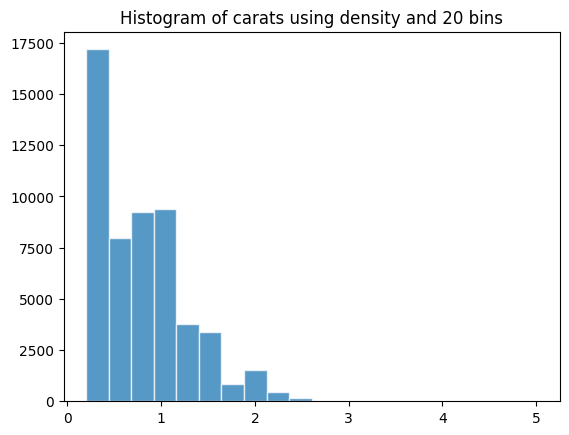

In [ ]:
fig, ax = plt.subplots()
ax.hist(
    diamonds["carat"],
    bins = 20,
    edgecolor = "white",
    linewidth = 1,
    #density = True,
    alpha = 0.75
);
ax.set_title("Histogram of carats using density and 20 bins")



Text(0.5, 1.0, 'Histogram of carats using density and 20 bins')

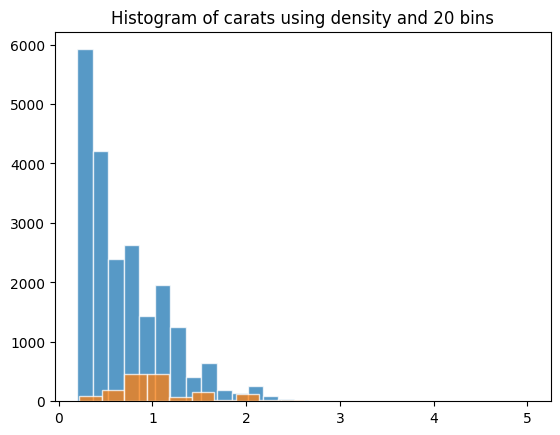

In [151]:
fig, ax = plt.subplots()
ax.hist(
    diamonds.loc[diamonds["cut"] == "Ideal", ["carat"]],
    bins = 20,
    edgecolor = "white",
    linewidth = 1,
    #density = True,
    alpha = 0.75
);

ax.hist(
    diamonds.loc[diamonds["cut"] == "Fair", ["carat"]],
    bins = 20,
    edgecolor = "white",
    linewidth = 1,
    #density = True,
    alpha = 0.75
);



ax.set_title("Histogram of carats using density and 20 bins")

In [150]:
 diamonds.loc[diamonds["cut"] == "Fair", ["carat"]]

,carat
8,0.22
91,0.86
97,0.96
123,0.70
124,0.70
...,...
53757,0.72
53800,0.90
53863,1.00
53879,1.04
